### Implementación adicional: Runge-Kutta de Orden 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RK4(sist, pi,pf, neq, npt, iv):
    """
    Algoritmo de Runge-Kutta de orden 4 para sistemas de ecuaciones diferenciales de orden 1. 
    Entradas:
        - sist: Función vectorial con el sistema
        - pi, pf: Extremos del intervalo donde solucionar el sistema
        - neq: Tamaño del sistema
        - npt: Si <1, indica tamaño de paso. Si >1, indica cantidad de puntos
        - iv: Vector con valores iniciales del sistema
    Salidas:
        - t: Lista de puntos donde se soluciona
        - w: Lista de listas con los valores de cada función del sistema en los tiempos de t
    """
    
    
    if npt>1:
        h = (pf-pi) / npt #Tamaño de paso
    else:
        h = npt
        npt =int( np.floor( (pf-pi) / h) )
    t_actual = pi
    t = [t_actual]
    w = [ [iv[i]] for i in range(len(iv))]
    
    
    for i in range(npt):
        w_old = [w[j][-1] for j in range(neq)] #Tupla con los valores obtenidos en la iteración anterior
        
        #Inicialización de los k_{i,j}
        k1 = [0]*neq
        k2 = [0]*neq
        k3 = [0]*neq
        k4 = [0]*neq
        
        #Cálculo de los k_{i,j}
        for j in range(neq):
            k1[j] = h * sist(t_actual,w_old)[j]
        for j in range(neq):
            k2[j] = h * sist(t_actual+h/2, [ w_old[s]+ k1[s] / 2 for s in range(neq)])[j]
        for j in range(neq):
            k3[j] = h * sist(t_actual+ h/2, [w_old[s] + k2[s] / 2 for s in range(neq)])[j]
        for j in range(neq):
            k4[j] = h * sist(t_actual+h, [w_old[s] + k3[s] for s in range(neq)])[j]
            
        #Cálculo de los siguientes puntos
        for j in range(neq):
            w[j].append(w_old[j] + (k1[j] + 2*k2[j] + 2*k3[j] + k4[j])/6)
        t_actual += h
        t.append(t_actual)
    return t,w 
    


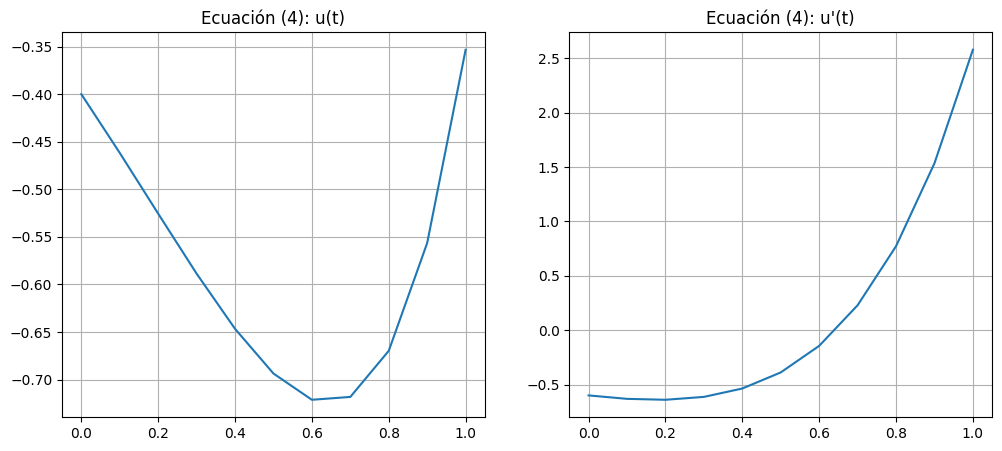

In [42]:
def ejemplo(t,y):
    """ 
    dy1 /dt = y2
    dy2/dt = exp(2t)sin(t) - 2 y1(t) + 2y2(t)
    """
    return [
         y[1],
         np.e ** (2*t) * np.sin(t) - 2*y[0] + 2*y[1]
            ]
    
sol = RK4(
    ejemplo,
    0,
    1,
    2,
    0.1,
    [-0.4, -0.6]
)


plt.figure(figsize=(12,5)) #Figura de solución
plt.subplot(121)
plt.plot(sol[0], sol[1][0], label='t')
plt.title('Ecuación (4): u(t)')
plt.grid(True)

plt.subplot(122) #Figura de derivada de solución
plt.plot(sol[0], sol[1][1], label='t')
plt.title("Ecuación (4): u'(t)")
plt.grid(True)


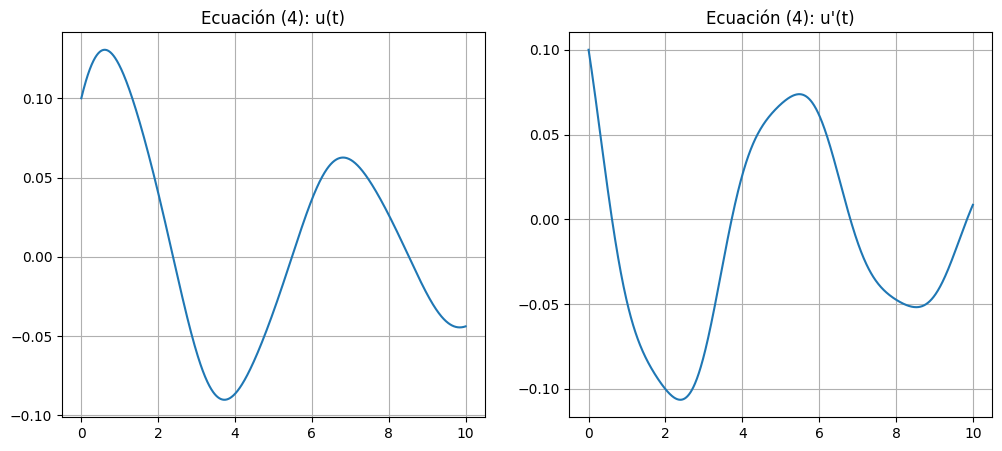

In [45]:
def slosh2(tau,y, epsilon = 0.2, lamda = 0.6, omega = 2):
    return[
        y[1],
        ((epsilon**2 * y[0]**3 / 6 ) - y[0])*(1 + epsilon * lamda * omega **2 * np.cos(omega * tau))
    ]

t_eval = np.linspace(0,10,1000)


sol = RK4(
    slosh2,
    0,
    10,
    2,
    1000,
    [0.1,0.1]
)

plt.figure(figsize=(12,5)) #Figura de solución
plt.subplot(121)
plt.plot(sol[0], sol[1][0], label='t')
plt.title('Ecuación (4): u(t)')
plt.grid(True)

plt.subplot(122) #Figura de derivada de solución
plt.plot(sol[0], sol[1][1], label='t')
plt.title("Ecuación (4): u'(t)")
plt.grid(True)